In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# ============================================================
# CARGA Y EXPLORACIÓN DEL DATASET
# ============================================================

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
print("Shape:", df.shape)
print("\nValores faltantes por columna:")
print(df.isna().sum())

Shape: (569, 30)

Valores faltantes por columna:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# ============================================================
# ESCALADO
# ============================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

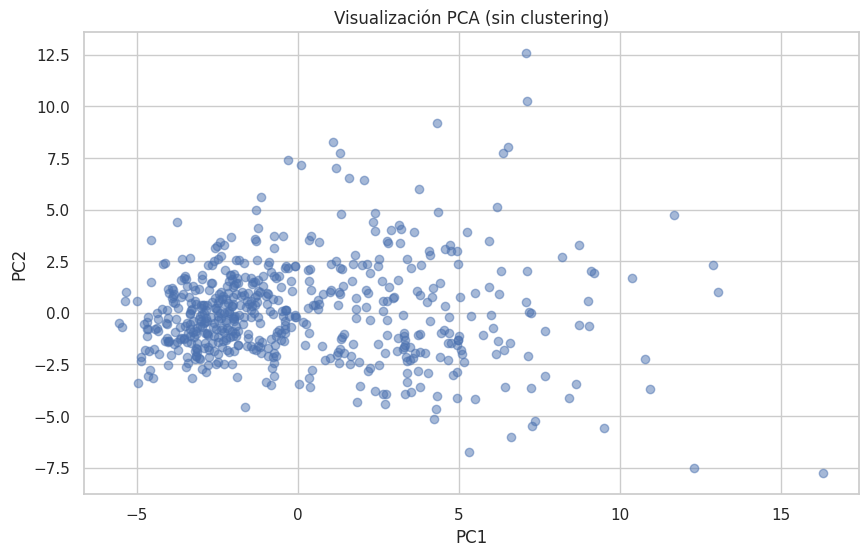

In [5]:
# ============================================================
# REDUCCIÓN PCA (para visualización)
# ============================================================

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title("Visualización PCA (sin clustering)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

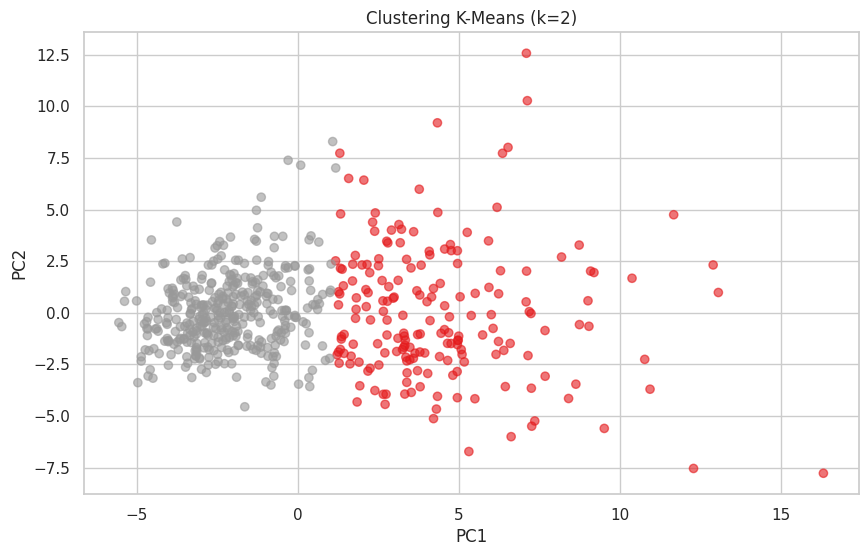

In [6]:
# ============================================================
# APLICACIÓN DE K-MEANS (k=2)
# ============================================================

kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set1', alpha=0.6)
plt.title("Clustering K-Means (k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Como se sospecha que hay dos tipos de tumores, fijamos k=2.
Cada punto representa un paciente, y el color indica el grupo asignado.
Observamos dos clusters bien definidos, lo que sugiere que K-Means logra separar los patrones de malignidad sin etiquetas explícitas.

In [7]:
# ============================================================
# MÉTRICAS DE VALIDACIÓN INTERNA
# ============================================================

sil = silhouette_score(X_scaled, labels)
dbi = davies_bouldin_score(X_scaled, labels)
ch = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {sil:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz Index: {ch:.1f}")

Silhouette Score: 0.345
Davies-Bouldin Index: 1.312
Calinski-Harabasz Index: 267.7


### Métricas de Validación Interna
Estas métricas evalúan la calidad de los clústeres sin usar las etiquetas reales.

**Silhouette Score: 0.345**

- Análisis: Un valor de 0.345 se considera aceptable, pero no óptimo. Nos dice que los clústeres tienen cierto solapamiento, pero la estructura no es aleatoria.
- Conclusión: Sugiere que los clústeres son razonablemente cohesivos y separados, pero no tan nítidos como en otros datasets.

**Davies-Bouldin Index: 1.312**

- Análisis: Un valor de 1.312 no es ideal, ya que los valores por debajo de 1 suelen indicar una mejor separación.
- Conclusión: Confirma que la distancia entre los clústeres es solo ligeramente mayor que la dispersión interna, lo que coincide con un Silhouette Score moderado.

**Calinski-Harabasz Index: 267.7**

- Análisis: Al igual que el Davies-Bouldin Index, este valor es un indicativo de la calidad de la agrupación. Un valor alto como 267.7 sugiere que los clústeres están razonablemente bien separados.
- Conclusión: Esto nos dice que hay una estructura de clústeres, pero el valor no es tan alto como en un dataset con clústeres perfectos.

In [8]:
# ============================================================
# COMPARACIÓN CON ETIQUETAS REALES (VALIDACIÓN EXTERNA)
# ============================================================
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

true_labels = data.target
ari = adjusted_rand_score(true_labels, labels)
nmi = normalized_mutual_info_score(true_labels, labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")

Adjusted Rand Index (ARI): 0.671


2. Métricas de Validación Externa
Estas métricas comparan los resultados del clustering con el diagnóstico real de los tumores.

**Adjusted Rand Index (ARI): 0.671**

- Significado: Mide la similitud entre los clústeres y las etiquetas reales. Un valor de 1.0 es una coincidencia perfecta y 0.0 es un resultado aleatorio.
- Análisis: Una puntuación de 0.671 es muy buena. Nos dice que la agrupación que K-Means ha creado coincide con el diagnóstico real en más del 67% de los casos. Esto es una señal muy fuerte de que el modelo ha descubierto la estructura subyacente que separa los tumores benignos de los malignos.

,mean radius,mean texture,mean smoothness
Cluster,,,
0,17.56,21.36,0.10
1,12.42,18.26,0.09


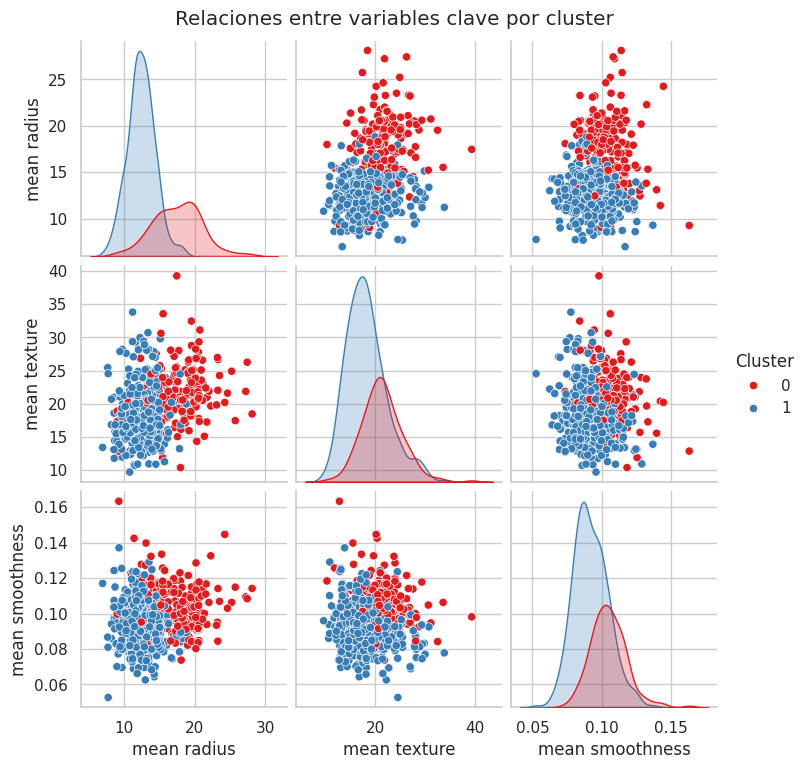

In [9]:
# ============================================================
# ANÁLISIS DE VARIABLES POR CLUSTER
# ============================================================

df['Cluster'] = labels
summary = df.groupby('Cluster')[['mean radius','mean texture','mean smoothness']].mean().round(2)
display(summary)

sns.pairplot(df[['mean radius','mean texture','mean smoothness','Cluster']],
             hue='Cluster', palette='Set1')
plt.suptitle("Relaciones entre variables clave por cluster", y=1.02)
plt.show()

### Resultados

Los clusters muestran diferencias claras en variables como:

Radio y textura: mayor tamaño y rugosidad en tumores malignos.

Suavidad: menor regularidad en tumores benignos.
En un contexto biomédico, estas diferencias pueden traducirse en características celulares observables por microscopía.